<a href="https://colab.research.google.com/github/narsym/deep-learning-with-tensorflow-2.0/blob/master/Very_deep_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using In built VGG16 model

[FOR MORE INBUILT MODELS](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib
import numpy as np


**Prebuilt model with pre-trained weights on Imagenet**

In [2]:
model = VGG16(weights = 'imagenet',include_top=True)
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy')

553467904/553467096 [==============================] - 3s 0us/step


resize into vgg16 trained image format

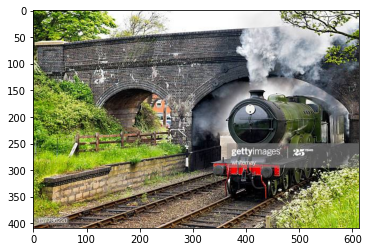

In [7]:
req = urllib.request.urlopen('https://media.gettyimages.com/photos/steam-train-passing-under-a-bridge-picture-id157736220?s=612x612')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [0]:
img = cv2.resize(img,(224,224))
img = img.astype('float32')
img = np.expand_dims(img,axis = 0)

Predict the class of image

In [9]:
out = model.predict(img)
index = np.argmax(out)
print(index)

820


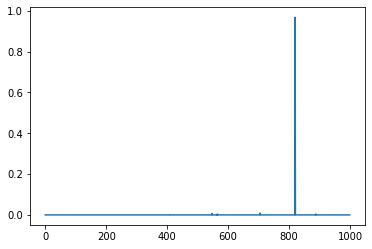

In [10]:
plt.plot(out.ravel())
plt.show()

820 is the class number for steam train in ImageNet dataset.
[you can check here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

#Recycling Prebuilt models for Extracting features (Transfer Learning)

We are using VGG16 for this.

In [11]:
base_model = VGG16(weights = 'imagenet', include_top = True)
print(base_model)

In [13]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.output_shape)

0 input_2 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


**Extract features from block4_pool block**

In [0]:
model = models.Model(inputs = base_model.input,outputs = base_model.get_layer('block4_pool').output)

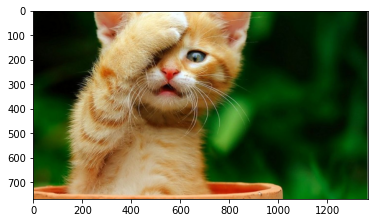

In [18]:
req = urllib.request.urlopen('https://i.pinimg.com/originals/9d/ca/8a/9dca8a6cd2ee9a6832d82dcd4cf8f1d2.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img,(224,224))
img = img.astype('float32')
img = np.expand_dims(img,axis = 0)

**Extracting Features**

In [20]:
features = model.predict(img)
print(features.tolist())

[[[[33.5223274230957, 16.11712074279785, 65.46558380126953, 0.0, 0.0, 94.91999053955078, 103.1343002319336, 65.24411010742188, 0.0, 0.0, 3.840599298477173, 23.15311622619629, 0.0, 42.50503921508789, 100.1038818359375, 28.097646713256836, 4.325967788696289, 0.0, 0.0, 100.59475708007812, 20.41021728515625, 2.223201274871826, 0.0, 0.0, 0.0, 73.77992248535156, 39.86917495727539, 0.0, 0.0, 128.92945861816406, 64.86221313476562, 0.0, 0.0, 0.0, 2.620832920074463, 229.30125427246094, 14.987996101379395, 89.96022033691406, 38.5565071105957, 0.0, 0.0, 0.0, 100.83551025390625, 0.0, 34.75238037109375, 53.65262222290039, 0.0, 9.89896297454834, 20.914812088012695, 0.0, 59.332435607910156, 0.0, 25.44878387451172, 25.380889892578125, 7.414394855499268, 221.31900024414062, 0.0, 0.0, 0.0, 21.037412643432617, 0.0, 107.02274322509766, 15.371309280395508, 60.90540313720703, 0.0, 0.0, 0.0, 0.0, 8.044745445251465, 19.06705665588379, 1.6336191892623901, 0.0, 3.802060604095459, 0.0, 23.27535057067871, 32.77229

These Low level extracted features can be used for other generatlization of other tasks.